In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
plt.style.use('ggplot')
%matplotlib inline

/Users/mahsumkocabey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Import the Data

In [2]:
# DATA Sources

# LAS and LFB, as it is
LAS = '../data/LAS/DataApril2023/LAS-From 2018 to 2023.xlsx'
LFB = '../data/LFB/LFB Incident data 2020 to 2023.xlsx'

# LSOA data source
LSOA = '../data/LSOA-Census-Demographics/'
# LSOA would also need specific file name:
DATA_age_on_arrival = LSOA + 'Age on arrival in UK.xlsx'
DATA_country_of_birth = LSOA + 'Country of birth.xlsx'
DATA_five_year_age_bandth = LSOA + 'Five year age bands.xlsx'
DATA_household_composition = LSOA + 'Household composition.xlsx'
DATA_household_deprivation = LSOA + 'Household deprivation.xlsx'
DATA_household_size = LSOA + 'Household size.xlsx'
# ------
DATA_acco_type = LSOA + 'accommodation type.xlsx'
DATA_cars = LSOA + 'cars or vans.xlsx'
DATA_ethnicity = LSOA + 'Ethnic group.xlsx'
DATA_house_lang = LSOA + 'Household Language.xlsx'
DATA_religion = LSOA + 'Religion.xlsx'
DATA_house_prices = LSOA + 'house prices.csv'

# Demographics Analysis

In [3]:
least_call_borough_names = ['Richmond upon Thames', 'Kingston upon Thames', 'Sutton', 'Merton']
most_call_borough_names = ['Croydon']
las_most_borough_names = ['Croydon', 'Ealing', 'Barnet', 'Enfield', 'Brent']
lfb_most_borough_names = ['Westminster', 'Tower Hamlets', 'Croydon', 'Southwark', 'Camden']
las_least_borough_names = ['City of London', 'Kingston upon Thames', 'Richmond upon Thames', 'Kensington and Chelsea', 'Merton']
lfb_least_borough_names = ['City of London', 'Kingston upon Thames', 'Merton', 'Richmond upon Thames', 'Harrow']

In [131]:
country_of_birth = pd.read_excel(DATA_country_of_birth, engine='openpyxl',sheet_name='2021')
household_size = pd.read_excel(DATA_household_size, engine='openpyxl',sheet_name='2021')
household_deprivation = pd.read_excel(DATA_household_deprivation, engine='openpyxl',sheet_name='2021')
household_composition = pd.read_excel(DATA_household_composition, engine='openpyxl',sheet_name='2021')
five_year_age_bandth = pd.read_excel(DATA_five_year_age_bandth, engine='openpyxl',sheet_name='2021')
age_on_arrival = pd.read_excel(DATA_age_on_arrival, engine='openpyxl',sheet_name='2021')

In [173]:
acco_type = pd.read_excel(DATA_acco_type, engine='openpyxl',sheet_name='2021')
cars = pd.read_excel(DATA_cars, engine='openpyxl',sheet_name='2021')
ethnicity = pd.read_excel(DATA_ethnicity, engine='openpyxl',sheet_name='2021')
house_lang = pd.read_excel(DATA_house_lang, engine='openpyxl',sheet_name='2021')
religion = pd.read_excel(DATA_religion, engine='openpyxl',sheet_name='2021')
house_prices = pd.read_csv(DATA_house_prices)

### Generate Bar Charts

In [150]:
def generate_norm_graph(df, df2, title, y=[0,105,5]):
    # Filter the grouped_df DataFrame to only include the boroughs of interest
    df1 = grouped_df.loc[df]
    # Normalize the data by dividing by 'All Usual residents' column and multiplying by 100 to get percentages
    norm_d1 = df1.apply(lambda row: row / df2.loc[row.name] * 100, axis=1)
    
    # Melt the DataFrame into a format suitable for seaborn
    melted_df = norm_d1[columns_to_include].reset_index().melt(id_vars='local authority name')

    # Create the plot
    plt.figure(figsize=(15, 10))
    sns.barplot(x='variable', y='value', hue='local authority name', data=melted_df)

    # Rotate x-axis labels 90 degrees
    plt.xticks(rotation=90)

    # Change y-axis increment
    plt.yticks(np.arange(y[0], y[1], y[2]))
    # Add labels and title
    plt.xlabel("")
    plt.ylabel('Percentage %')
    plt.title('Percentage of Households with '+ title)

    plt.show()

------

## Mean House Prices Per Borough

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Code    33 non-null     object
 1   Area    33 non-null     object
 2   Price   33 non-null     object
dtypes: object(3)
memory usage: 920.0+ bytes


In [9]:
house_prices = house_prices[['Area', 'Price']]
# Replace dollar sign and commas, then convert to float
house_prices['Price'] = house_prices['Price'].str.replace('$', '').str.replace(',', '').astype(float)

In [10]:
house_prices['norm_prices'] = scaler.fit_transform(house_prices[['Price']])

<Figure size 1000x1500 with 0 Axes>

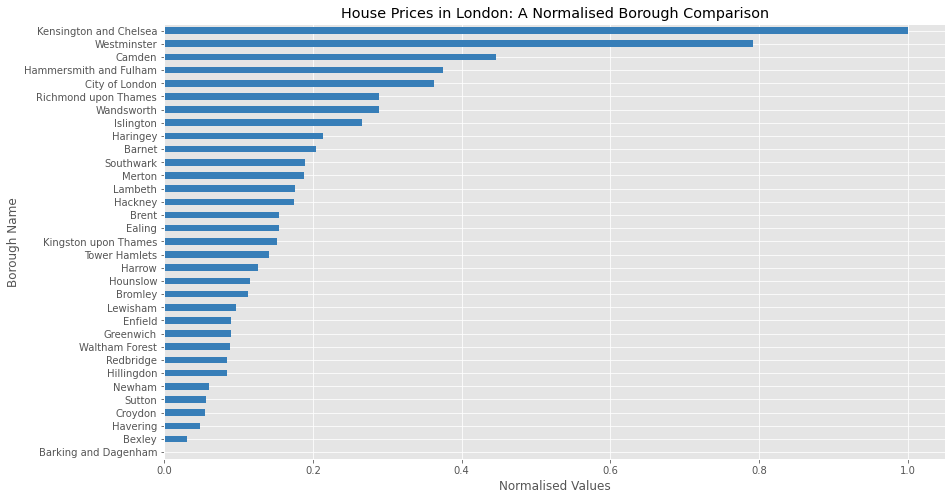

In [94]:
plt.figure(figsize=(10,15), dpi=100)
house_prices.sort_values('norm_prices', inplace=True)  # Sort the DataFrame by 'norm_prices' for better visualization
house_prices.plot(kind='barh', x='Area', y='norm_prices', legend=False, color='#377eb8', figsize=[14,8], title='House Prices in London: A Normalised Borough Comparison')
plt.xlabel('Normalised Values')  # label for x-axis
plt.ylabel('Borough Name')
plt.show()

----------

## Country of Brith Analysis

In [52]:
country_of_birth.head()

,LSOA code,local authority name,local authority code,All Usual residents,United Kingdom,European Union EU14,Other EU countries,non-EU Europe,Africa,Middle East and Asia,Americas and Caribbean,Others,Non-UK
0,E01000001,City of London,E09000001,1478,874,176,53,61,32,134,102,46,604
1,E01000002,City of London,E09000001,1382,759,167,49,46,44,171,102,44,623
2,E01000003,City of London,E09000001,1613,921,202,68,60,65,149,119,29,692
3,E01000005,City of London,E09000001,1098,565,95,31,22,89,196,95,5,533
4,E01032739,City of London,E09000001,1621,697,279,92,68,40,259,132,54,924


In [50]:
country_of_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   LSOA code               4994 non-null   object
 1   local authority name    4994 non-null   object
 2   local authority code    4994 non-null   object
 3   All Usual residents     4994 non-null   int64 
 4   United Kingdom          4994 non-null   int64 
 5   European Union EU14     4994 non-null   int64 
 6   Other EU countries      4994 non-null   int64 
 7   non-EU Europe           4994 non-null   int64 
 8   Africa                  4994 non-null   int64 
 9   Middle East and Asia    4994 non-null   int64 
 10  Americas and Caribbean  4994 non-null   int64 
 11  Others                  4994 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 468.3+ KB


In [59]:
# Rename the columns
country_of_birth.rename(columns={'Australasia, other Oceania and Other including British Overseas Territories'
                                 : 'Others'}, inplace=True)

country_of_birth['Non-UK'] = country_of_birth.iloc[:, 5:].sum(axis=1)

# Define columns to include in the analysis
columns_to_include = [country_of_birth.columns[4], country_of_birth.columns[12]]

# Group the data by borough and sum all rows for each borough
grouped_df = country_of_birth.groupby('local authority name')[columns_to_include].sum()

# Calculate 'All Usual residents' for each borough
all_usual_residents = country_of_birth.groupby('local authority name')['All Usual residents'].sum()

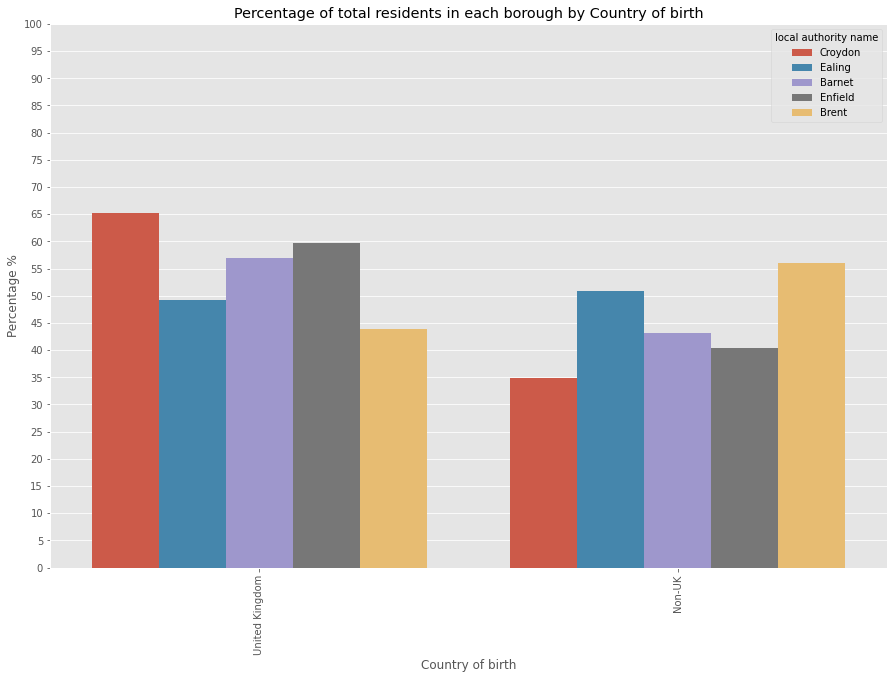

In [60]:
generate_norm_graph(las_most_borough_names, all_usual_residents, "Country of birth")

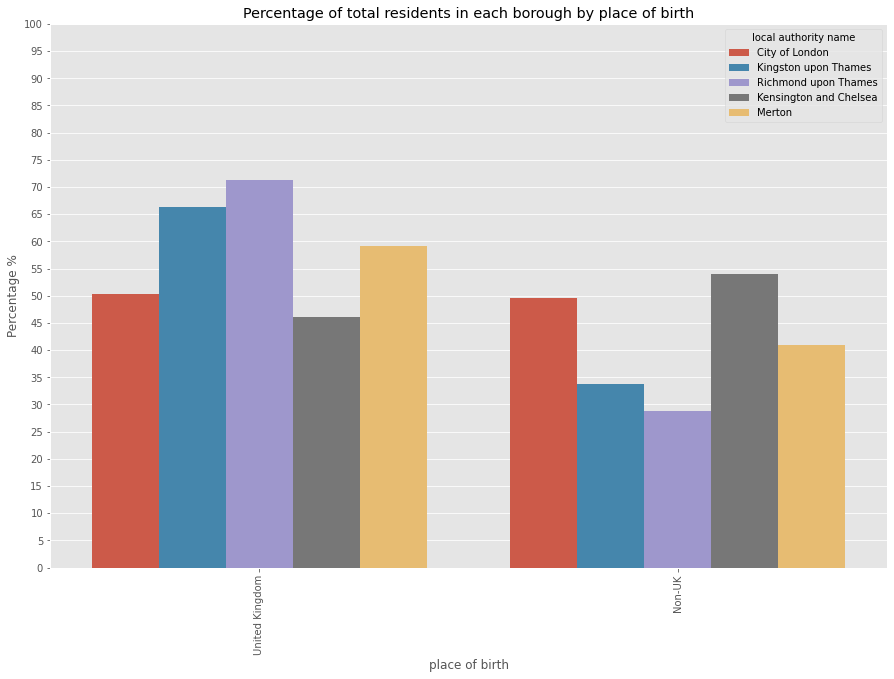

In [61]:
generate_norm_graph(las_least_borough_names, all_usual_residents, "place of birth")

-----------

## HouseHold Size

In [105]:
household_size = household_size.copy()

In [106]:
household_size['4 or more people in household'] = household_size.iloc[:, 7:].sum(axis=1)

In [107]:
# Define columns to include in the analysis
columns_to_include = [household_size.columns[4], household_size.columns[5],
                      household_size.columns[6], household_size.columns[-1]]

# Group the data by borough and sum all rows for each borough
grouped_df = household_size.groupby('local authority name')[columns_to_include].sum()

# Calculate 'All Usual residents' for each borough
all_households = household_size.groupby('local authority name')['All Households'].sum()

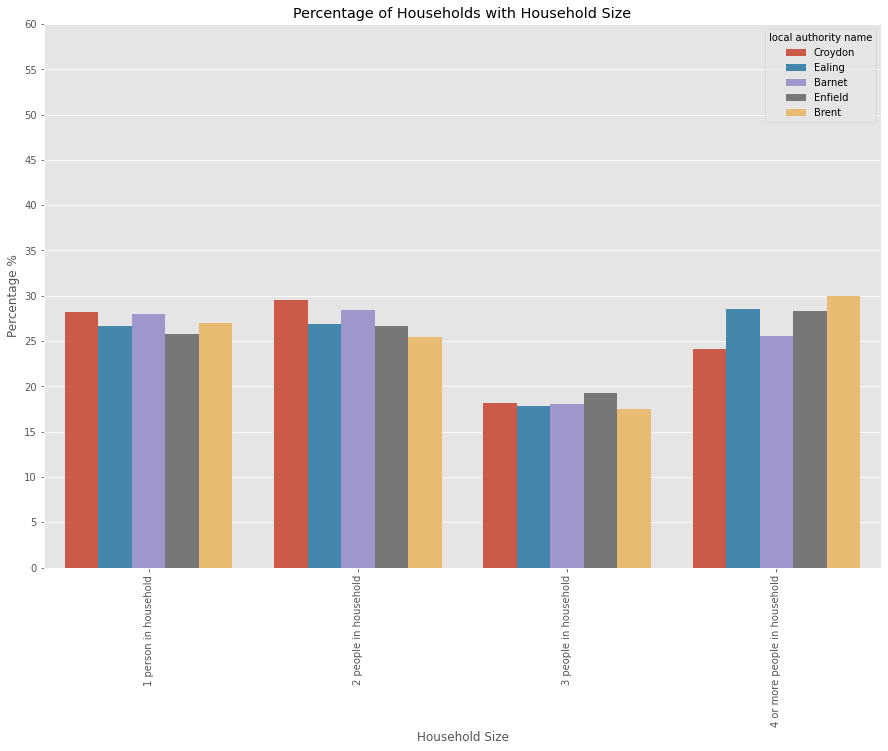

In [108]:
generate_norm_graph(las_most_borough_names, all_households, "Household Size", y=[0,65,5])

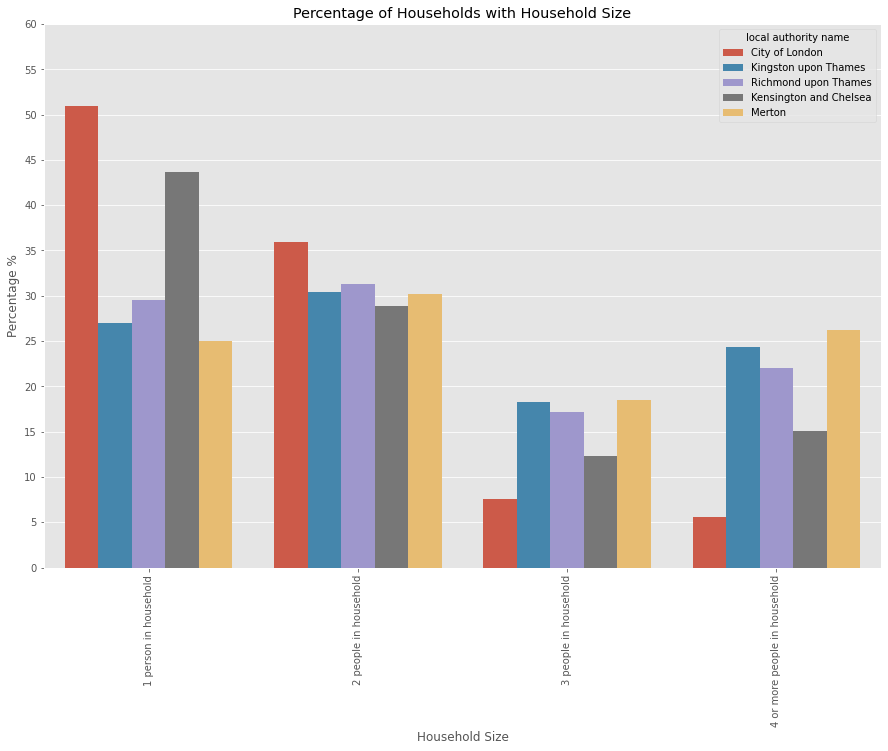

In [109]:
generate_norm_graph(las_least_borough_names, all_households, "Household Size", y=[0,65,5])

-----------

## Age of Residents Analysis

In [135]:
five_year_age_bandth.head(2)

,LSOA code,local authority code,local authority name,All usual residents,Aged 4 and under,Aged 5 to 9,Aged 10 to 14,Aged 15 to 19,Aged 20 to 24,Aged 25 to 29,Aged 30 to 34,Aged 35 to 39,Aged 40 to 44,Aged 45 to 49,Aged 50 to 54,Aged 55 to 59,Aged 60 to 64,Aged 65 to 69,Aged 70 to 74,Aged 75 to 79,Aged 80 to 84,Aged 85 and over,Aged 0-14,Aged 15-29,Aged 30-44,Aged 45-59,Aged 60-74,Aged 75+
0,E01000001,E09000001,City of London,1484,52,35,32,23,91,160,132,121,114,105,89,74,84,120,101,58,57,36,119,274,367,268,363,212
1,E01000002,E09000001,City of London,1382,34,23,22,30,100,166,134,110,92,95,122,89,87,74,70,59,43,32,79,296,336,306,290,154


In [134]:
five_year_age_bandth['Aged 0-14'] = five_year_age_bandth.iloc[:, 4:7].sum(axis=1)
five_year_age_bandth['Aged 15-29'] = five_year_age_bandth.iloc[:, 7:10].sum(axis=1)
five_year_age_bandth['Aged 30-44'] = five_year_age_bandth.iloc[:, 10:13].sum(axis=1)
five_year_age_bandth['Aged 45-59'] = five_year_age_bandth.iloc[:, 13:16].sum(axis=1)
five_year_age_bandth['Aged 60-74'] = five_year_age_bandth.iloc[:, 16:20].sum(axis=1)
five_year_age_bandth['Aged 75+'] = five_year_age_bandth.iloc[:, 20:23].sum(axis=1)


In [136]:
# Define columns to include in the analysis
columns_to_include = list(five_year_age_bandth)[-6:]

# Group the data by borough and sum all rows for each borough
grouped_df = five_year_age_bandth.groupby('local authority name')[columns_to_include].sum()

# Calculate 'All Usual residents' for each borough
age_analysis = five_year_age_bandth.groupby('local authority name')['All usual residents'].sum()

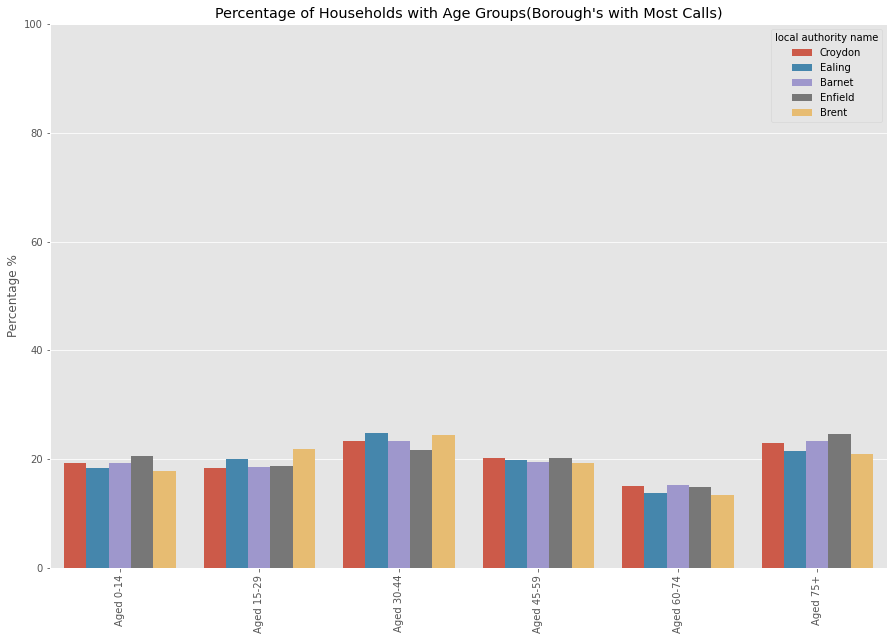

In [151]:
generate_norm_graph(las_most_borough_names, age_analysis, "Age Groups(Borough's with Most Calls)", y=[0,105,20])

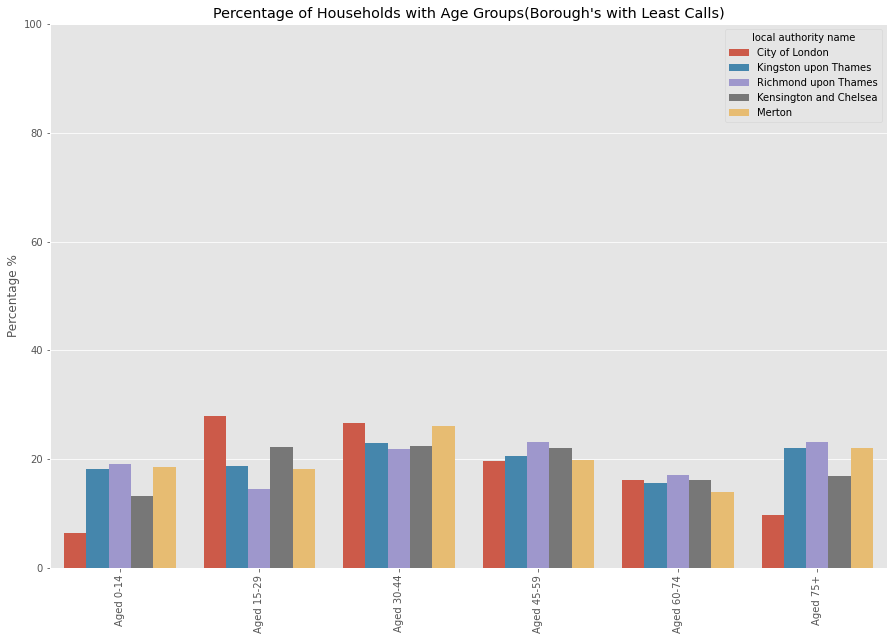

In [152]:
generate_norm_graph(las_least_borough_names, age_analysis, "Age Groups(Borough's with Least Calls)", y=[0,105,20])

-------------

## HouseHold Composition

In [21]:
# Define columns to include in the analysis
columns_to_include = list(household_composition)[4:]

# Group the data by borough and sum all rows for each borough
grouped_df = household_composition.groupby('local authority name')[columns_to_include].sum()

# Calculate 'All Usual residents' for each borough
household_composition_analysis = household_composition.groupby('local authority name')['All households'].sum()

**LFB Most and Least Calls by household composition**

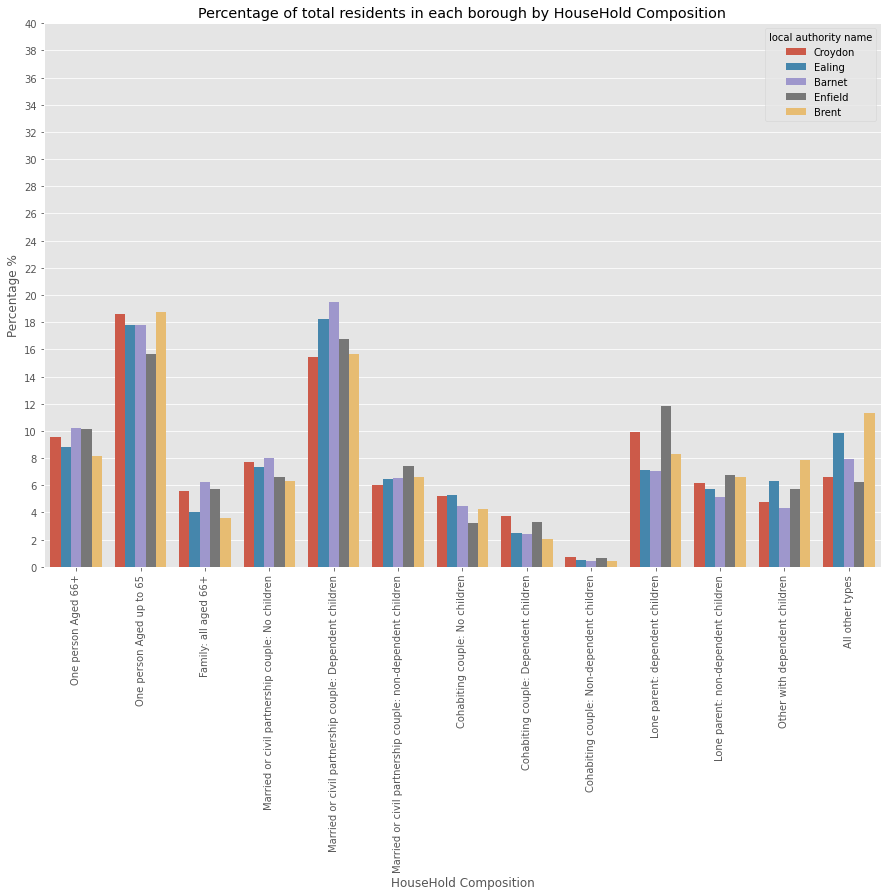

In [22]:
generate_norm_graph(las_most_borough_names, household_composition_analysis, "HouseHold Composition", y=[0,42,2])

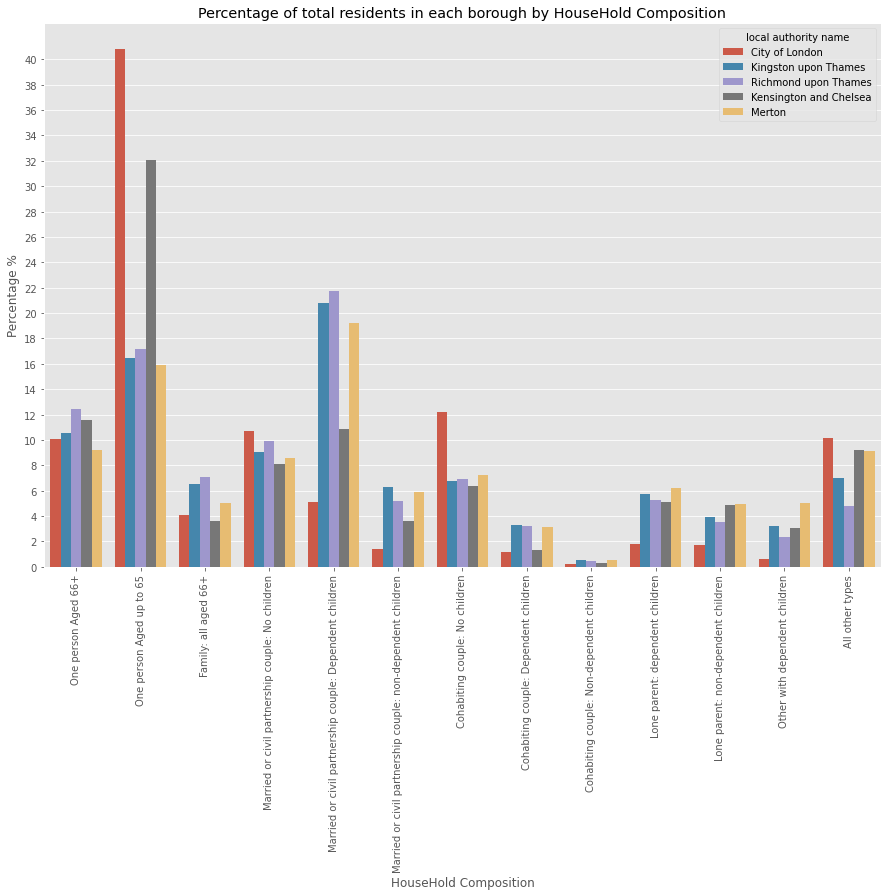

In [23]:
generate_norm_graph(las_least_borough_names, household_composition_analysis, "HouseHold Composition", y=[0,42,2])

-------

## Age On Arrival

In [24]:
# Define columns to include in the analysis
columns_to_include = list(age_on_arrival.columns)[4:]
# Group the data by borough and sum all rows for each borough
grouped_df = age_on_arrival.groupby('local authority name')[columns_to_include].sum()
# Calculate 'All Usual residents' for each borough
age_on_arrival_analysis = age_on_arrival.groupby('local authority name')['All usual residents'].sum()

**LFB Most and Least Calls by household composition**

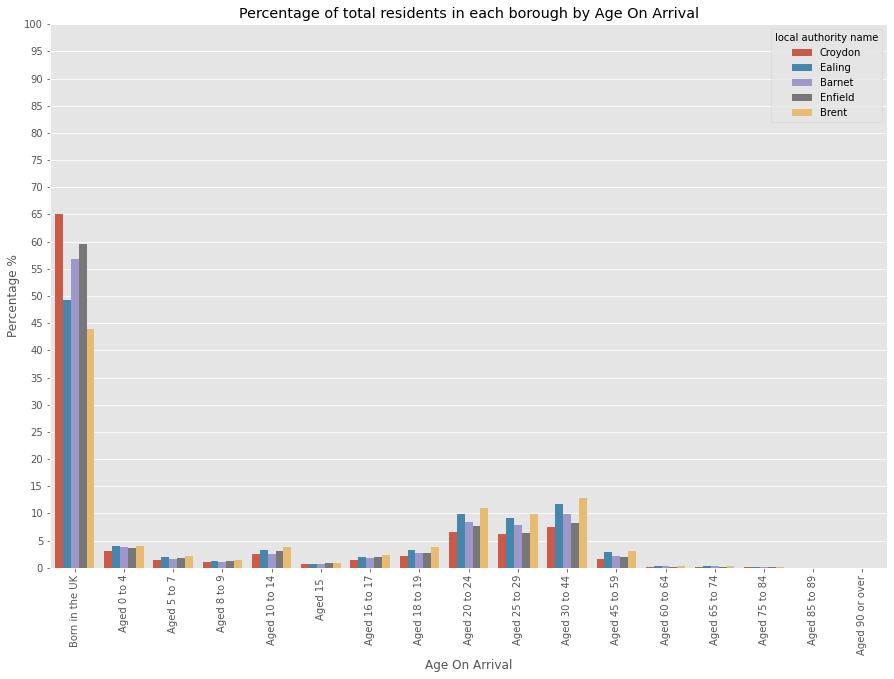

In [25]:
generate_norm_graph(las_most_borough_names, age_on_arrival_analysis, "Age On Arrival", y=[0,105,5])

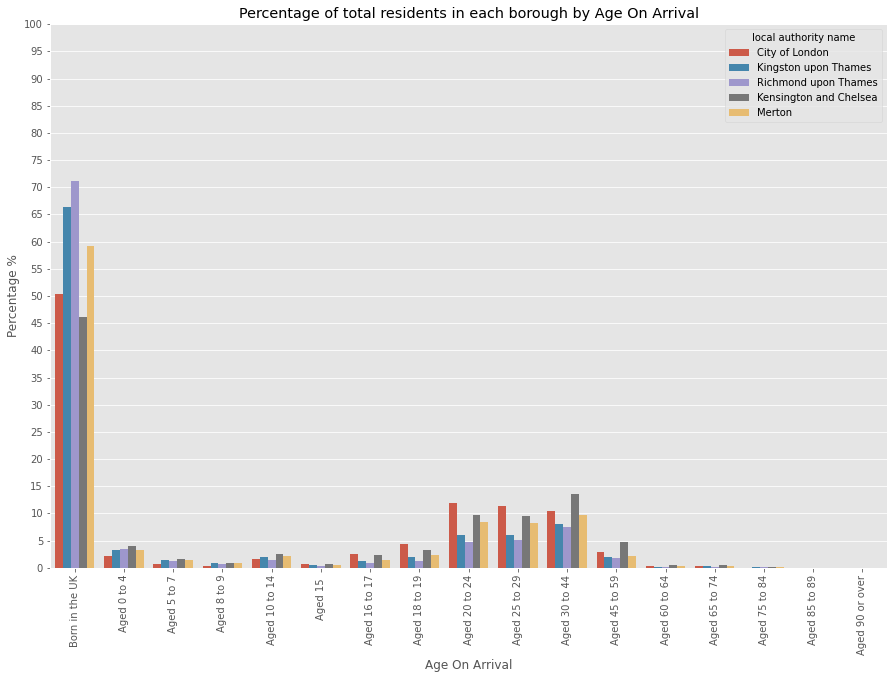

In [26]:
generate_norm_graph(las_least_borough_names, age_on_arrival_analysis, "Age On Arrival", y=[0,105,5])

-----------

## Household deprivation

In [27]:
# Define columns to include in the analysis
columns_to_include = list(household_deprivation.columns)[4:]
# Group the data by borough and sum all rows for each borough
grouped_df = household_deprivation.groupby('local authority name')[columns_to_include].sum()
# Calculate 'All Usual residents' for each borough
household_deprivation_analysis = household_deprivation.groupby('local authority name')['All Households'].sum()

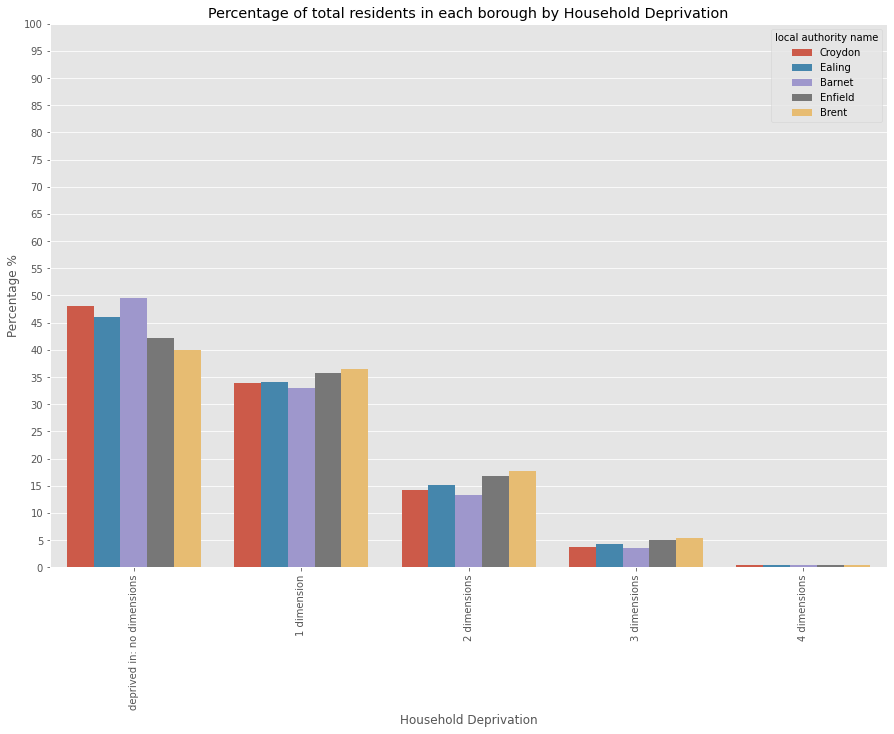

In [28]:
generate_norm_graph(las_most_borough_names, household_deprivation_analysis, "Household Deprivation", y=[0,105,5])

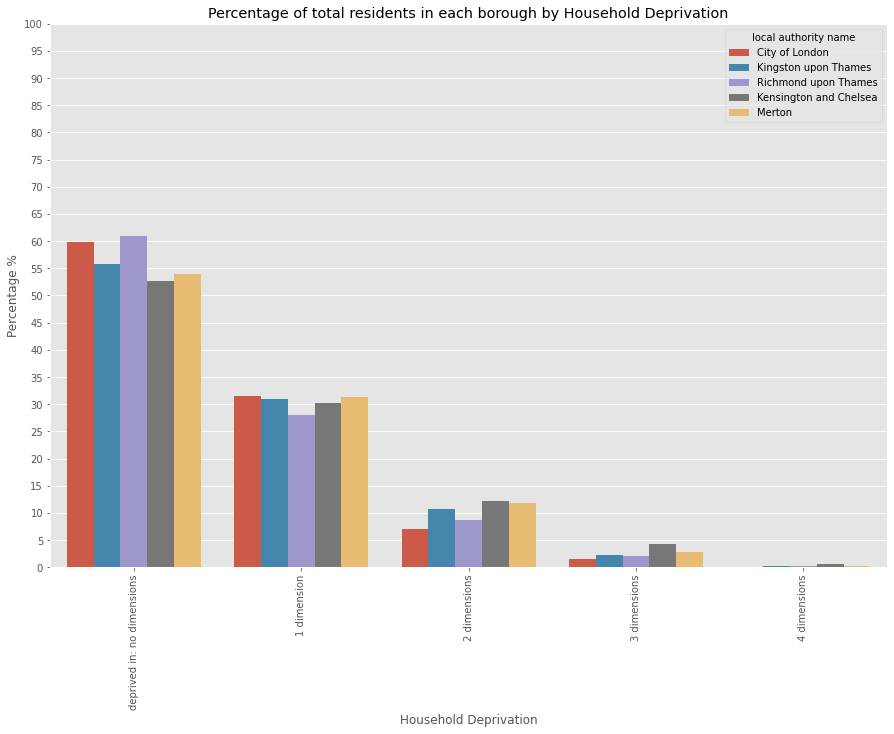

In [29]:
generate_norm_graph(las_least_borough_names, household_deprivation_analysis, "Household Deprivation", y=[0,105,5])

-------

## Accomodation Type

In [110]:
acco_type.head()

,ward code,ward name,local authority code,local authority name,All households,Detached,Semi-detached,Terraced,Purpose built flat,Flat in a converted/shared house,"In a commercial building or other converted, non-residential",Caravan / other mobile or temporary structure
0,E09000001,City of London,E09000001,City of London,4915,7,17,78,4274,337,202,0
1,E05014053,Abbey,E09000002,Barking and Dagenham,1454,37,86,235,986,50,56,4
2,E05014054,Alibon,E09000002,Barking and Dagenham,3343,199,799,1785,436,89,34,1
3,E05014055,Barking Riverside,E09000002,Barking and Dagenham,3386,145,483,935,1791,21,10,1
4,E05014056,Beam,E09000002,Barking and Dagenham,2712,194,694,1380,309,95,39,1


In [30]:
# Define columns to include in the analysis
columns_to_include = list(acco_type.columns)[5:]
# Group the data by borough and sum all rows for each borough
grouped_df = acco_type.groupby('local authority name')[columns_to_include].sum()
# Calculate 'All Usual residents' for each borough
acco_type_analysis = acco_type.groupby('local authority name')['All households '].sum()

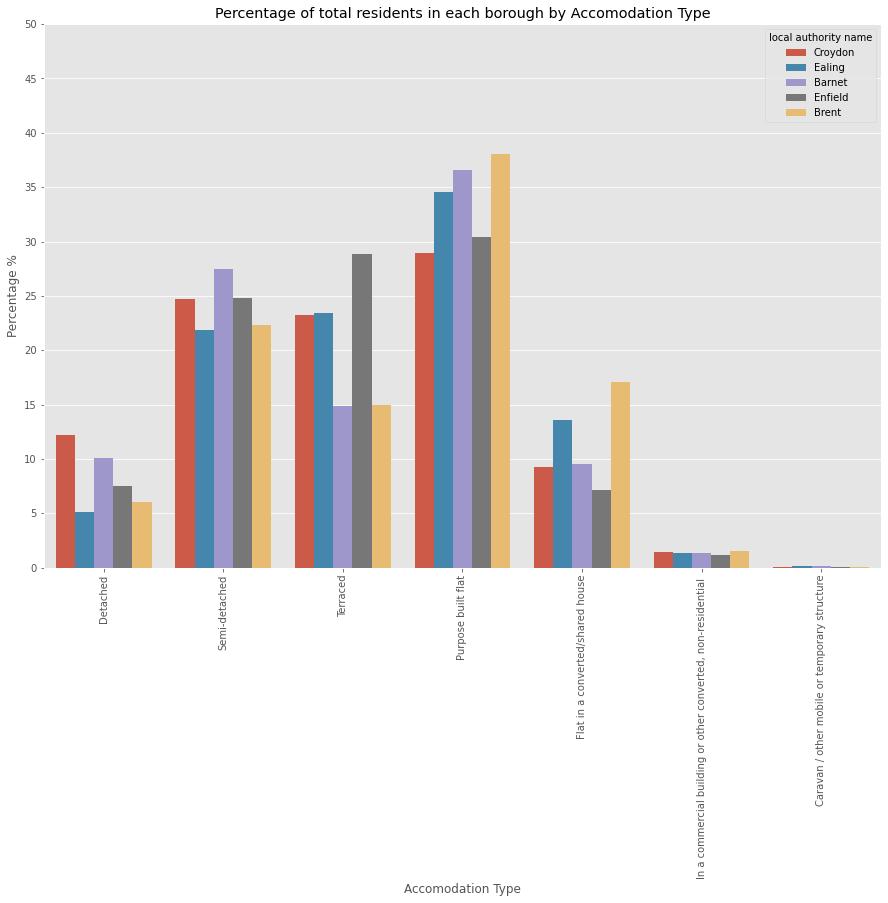

In [31]:
generate_norm_graph(las_most_borough_names, acco_type_analysis, "Accomodation Type", y=[0,55,5])

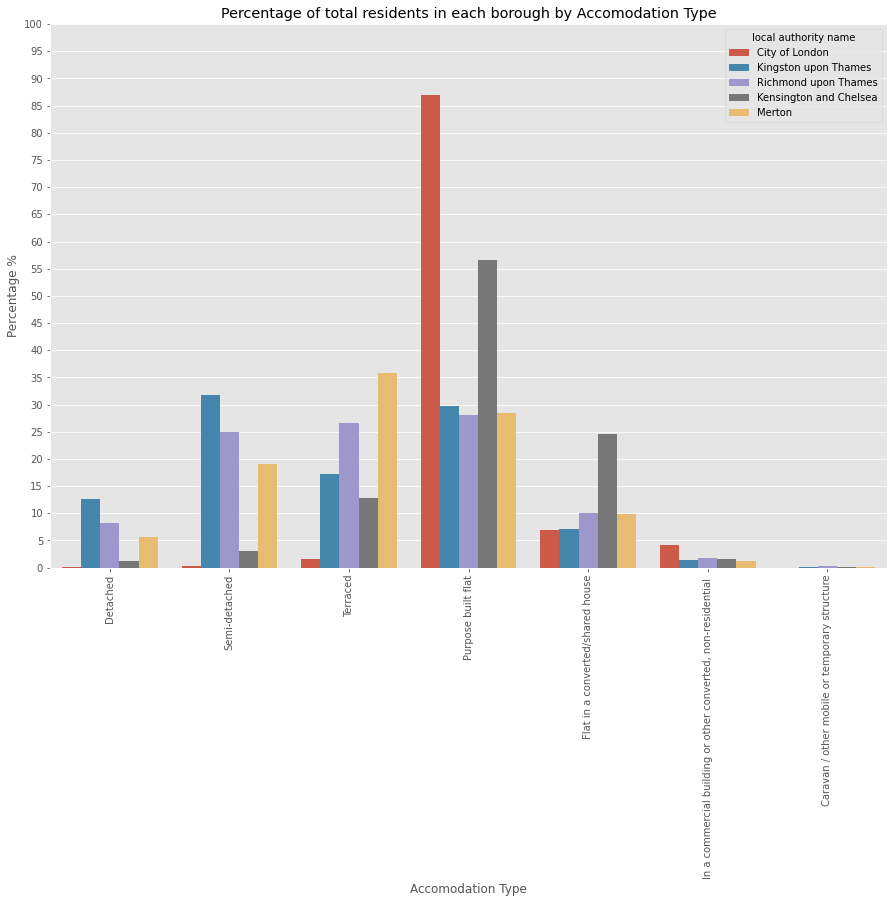

In [32]:
generate_norm_graph(las_least_borough_names, acco_type_analysis, "Accomodation Type", y=[0,105,5])

## CARS

In [64]:
cars = cars.copy()

In [65]:
# Drop rows with missing values
cars.dropna(inplace=True)

# Change data type of columns from index 4 to 8 (inclusive) from float64 to int
for col in cars.columns[4:9]:  # 9 is exclusive, so it will change columns 4 to 8
    cars[col] = cars[col].astype(int)


In [66]:
# Define columns to include in the analysis
columns_to_include = list(cars.columns)[5:]
# Group the data by borough and sum all rows for each borough
grouped_df = cars.groupby('local authority name')[columns_to_include].sum()
# Calculate 'All Usual residents' for each borough
cars_analysis = cars.groupby('local authority name')['All households '].sum()

In [72]:
cars.tail()

,ward code,ward name,local authority code,local authority name,All households,none,one,two,three or more
675,E05013805,Regent's Park,E09000033,Westminster,5655,3543,1686,336,90
676,E05013806,St James's,E09000033,Westminster,5159,3914,995,195,55
677,E05013807,Vincent Square,E09000033,Westminster,5158,3544,1379,208,27
678,E05013808,West End,E09000033,Westminster,6072,4480,1249,277,66
679,E05013809,Westbourne,E09000033,Westminster,4680,3068,1407,181,24


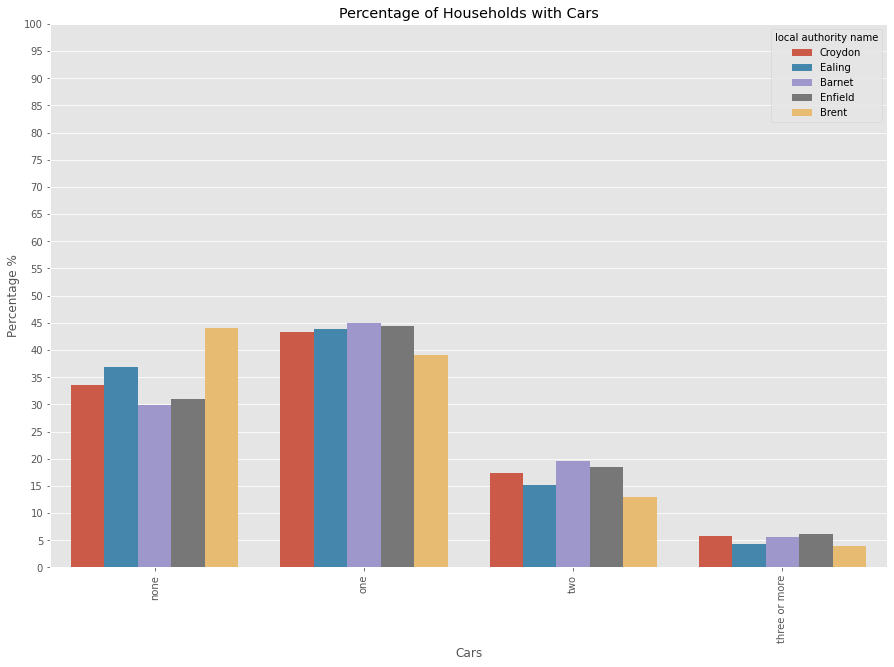

In [88]:
generate_norm_graph(las_most_borough_names, cars_analysis, "Cars", y=[0,105,5])

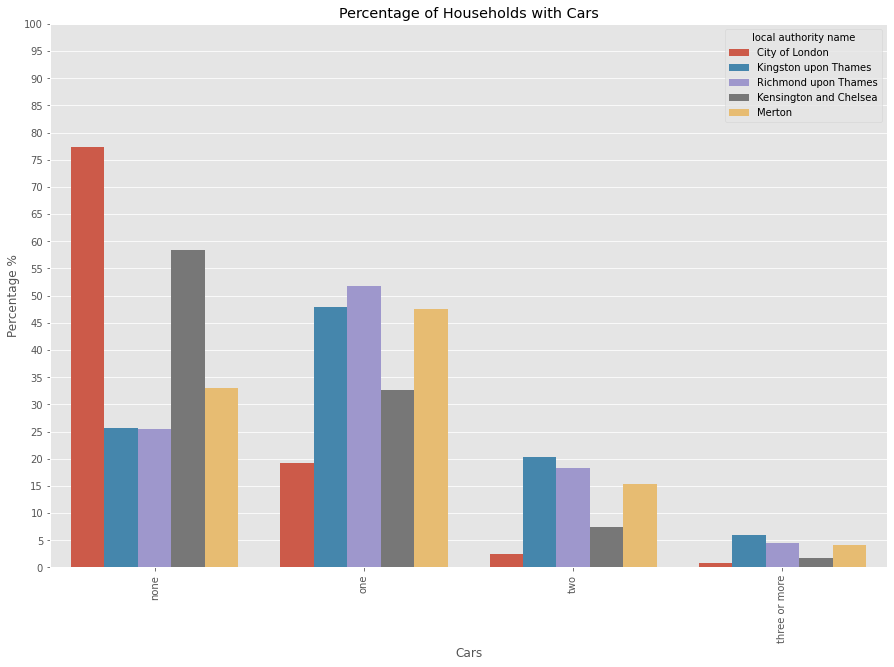

In [89]:
generate_norm_graph(las_least_borough_names, cars_analysis, "Cars", y=[0,105,5])

--------

## Ethnicity

In [188]:
ethnicity['All usual residents']

,ward code,ward name,local authority code,local authority name,All usual residents,White British,White Irish,White Gypsy/Irish Traveller,White Roma,White Other,Mixed White and Asian,Mixed White and Black African,Mixed White and Black Caribbean,Mixed Other,Asian Bangladeshi,Asian Chinese,Asian Indian,Asian Pakistani,Asian Other,Black African,Black Caribbean,Black Other,Other Arab,Other Any other,White other,Mixed,Asian,Black
0,E09000001,City of London (aggregated),E09000001,City of London,8584,3652,186,0,62,2065,173,50,56,188,283,544,322,32,259,150,54,26,113,369,2313,467,1440,230
1,E05014053,Abbey,E09000002,Barking and Dagenham,3963,447,17,3,34,691,28,29,30,36,346,87,968,358,131,453,68,70,42,125,745,123,1890,591
2,E05014054,Alibon,E09000002,Barking and Dagenham,9889,3845,71,15,47,1555,55,60,117,96,859,67,247,282,296,1529,214,237,57,240,1688,328,1751,1980
3,E05014055,Barking Riverside,E09000002,Barking and Dagenham,10055,1943,23,3,18,1163,60,163,175,176,969,91,374,593,201,2815,402,547,92,247,1207,574,2228,3764
4,E05014056,Beam,E09000002,Barking and Dagenham,8360,2488,73,17,25,1202,48,122,88,85,699,41,301,358,156,1814,251,297,39,256,1317,343,1555,2362


In [191]:
def generate_avg_norm_graph(df_most, df_least, df2, title, y=[0,105,5]):
    # Normalize the data by dividing each ethnic group by the total population in the borough
    norm_df = grouped_df.apply(lambda x: x / df2.loc[x.name] * 100, axis=1)

    # Compute average ethnic compositions for the most and least calling boroughs
    df_most_avg = norm_df.loc[df_most].mean()
    df_least_avg = norm_df.loc[df_least].mean()
    
    # Create DataFrames from the Series and add a new column to distinguish between most and least
    df_most_avg = pd.DataFrame(df_most_avg, columns=['value']).reset_index()
    df_most_avg['Call Volume'] = 'Boroughs with Most Calls'
    
    df_least_avg = pd.DataFrame(df_least_avg, columns=['value']).reset_index()
    df_least_avg['Call Volume'] = 'Boroughs with Least Calls'
    
    # Concatenate the DataFrames
    combined_df = pd.DataFrame(pd.concat([df_most_avg, df_least_avg]))

    # Create the plot
    plt.figure(figsize=(15, 10))
    sns.barplot(x='index', y='value', hue='Call Volume', data=combined_df)

    # Rotate x-axis labels 90 degrees
    plt.xticks(rotation=90)

    # Change y-axis increment
    plt.yticks(np.arange(y[0], y[1], y[2]))
    
    # Add labels and title
    plt.xlabel("")
    plt.ylabel('Percentage %')
    plt.title('Average Percentage of Households with '+ title)

    plt.show()

In [175]:
ethnicity['White other'] = ethnicity.iloc[:, 6:10].sum(axis=1)
ethnicity['Mixed'] = ethnicity.iloc[:, 10:14].sum(axis=1)
ethnicity['Asian'] = ethnicity.iloc[:, 14:19].sum(axis=1)
ethnicity['Black'] = ethnicity.iloc[:, 19:22].sum(axis=1)

In [177]:
# Define columns to include in the analysis
columns_to_include = [ethnicity.columns[5], ethnicity.columns[-4], ethnicity.columns[-3],
                     ethnicity.columns[-2],ethnicity.columns[-1],ethnicity.columns[-6], ethnicity.columns[-5]]
# Group the data by borough and sum all rows for each borough
grouped_df = ethnicity.groupby('local authority name')[columns_to_include].sum()
# Calculate 'All Usual residents' for each borough
ethnicity_analysis = ethnicity.groupby('local authority name')['All usual residents'].sum()

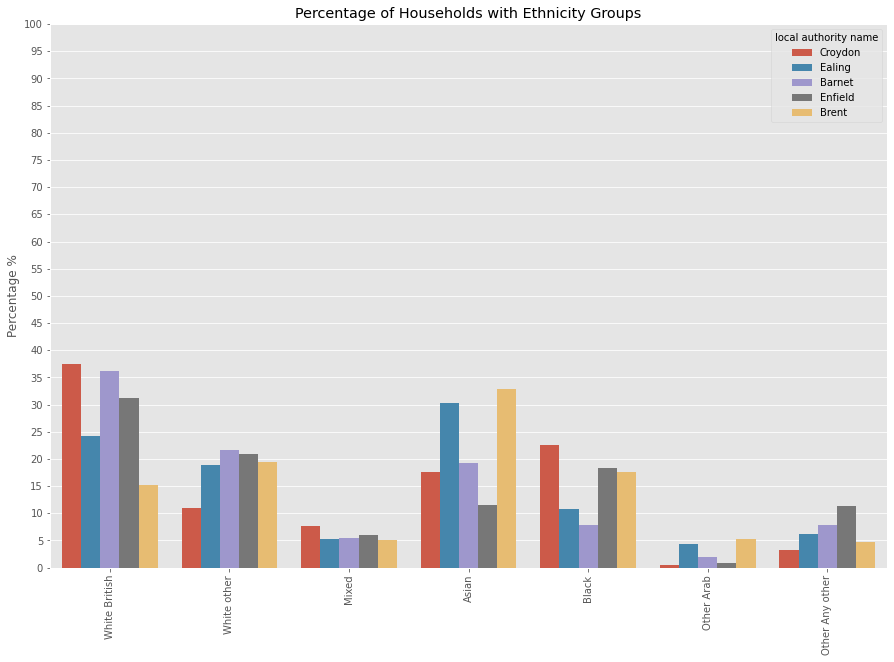

In [181]:
generate_norm_graph(las_most_borough_names, ethnicity_analysis, "Ethnicity Groups", y=[0,105,5])

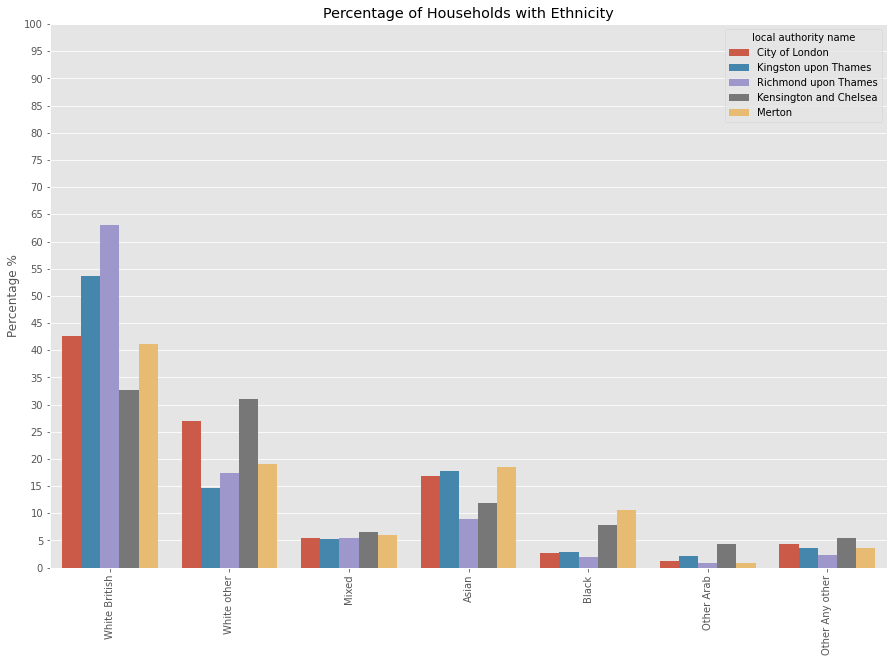

In [182]:
generate_norm_graph(las_least_borough_names, ethnicity_analysis, "Ethnicity", y=[0,105,5])

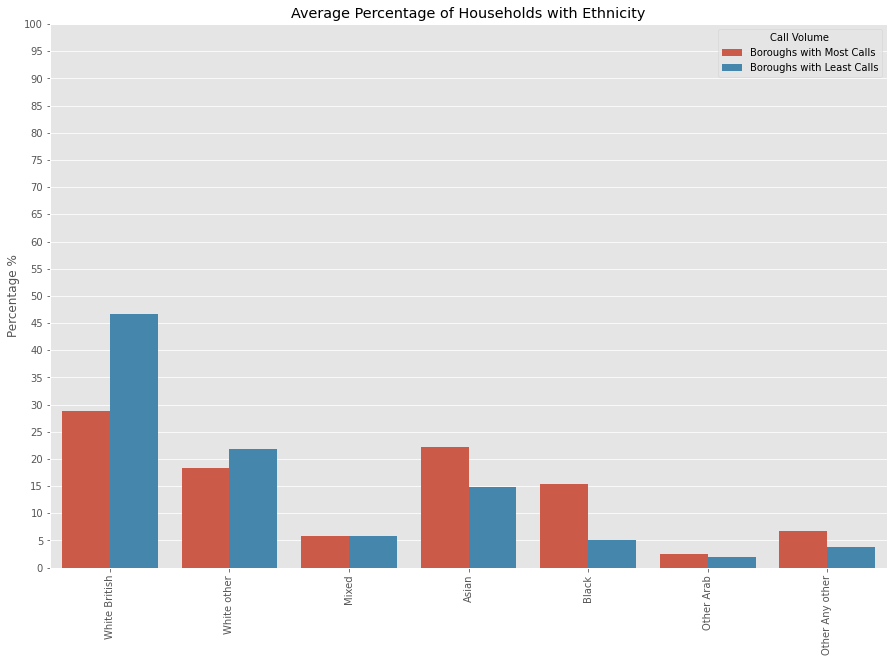

In [192]:
generate_avg_norm_graph(las_most_borough_names, las_least_borough_names, ethnicity_analysis, 'Ethnicity')

------

## Religion

In [39]:
# Define columns to include in the analysis
columns_to_include = list(religion.columns)[5:]
# Group the data by borough and sum all rows for each borough
grouped_df = religion.groupby('local authority name')[columns_to_include].sum()
# Calculate 'All Usual residents' for each borough
religion_analysis = religion.groupby('local authority name')['All usual residents'].sum()

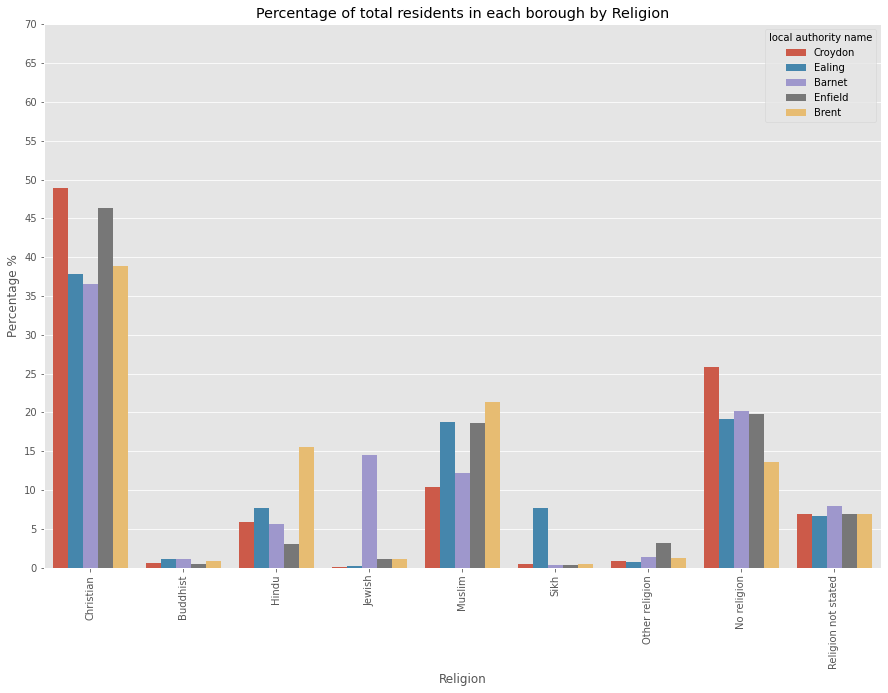

In [40]:
generate_norm_graph(las_most_borough_names, religion_analysis, "Religion", y=[0,75,5])

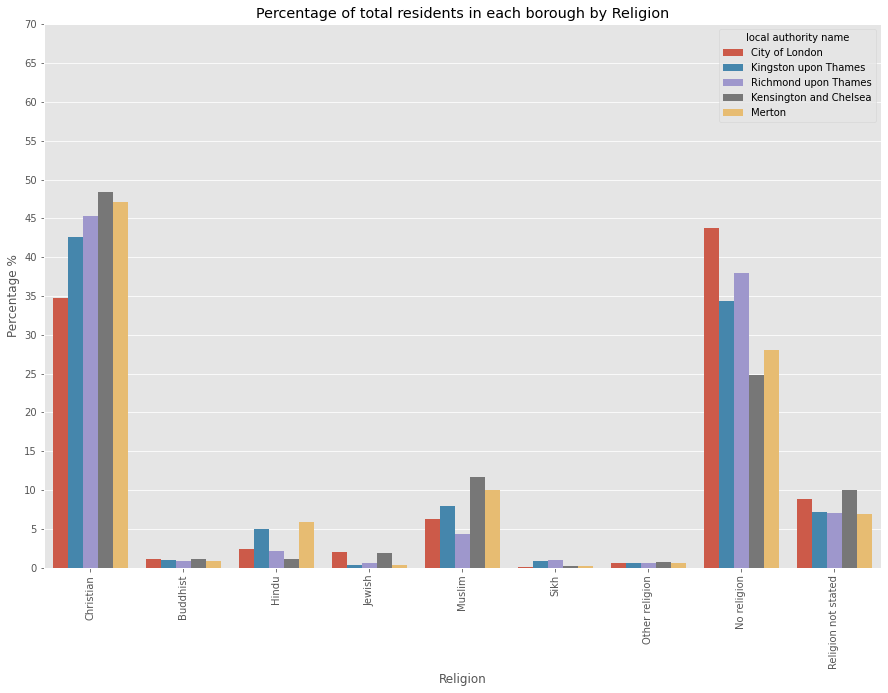

In [41]:
generate_norm_graph(las_least_borough_names, religion_analysis, "Religion", y=[0,75,5])

------

## Household Spoken Languages

In [45]:
house_lang.head(2)

,ward code,ward name,local authority code,local authority name,All households,All people 16+ have English as main language,At least one but not all people 16+ have English as main language,No people 16+ but one or more aged 3-15 has English as main language,No people have English as main language
0,E09000001,City of London (aggregated),E09000001,City of London,4921,3672,389,41,819
1,E05014053,Abbey,E09000002,Barking and Dagenham,1462,754,173,109,426


In [46]:
# Define columns to include in the analysis
columns_to_include = list(house_lang.columns)[5:]
# Group the data by borough and sum all rows for each borough
grouped_df = house_lang.groupby('local authority name')[columns_to_include].sum()
# Calculate 'All Usual residents' for each borough
language = house_lang.groupby('local authority name')['All households'].sum()

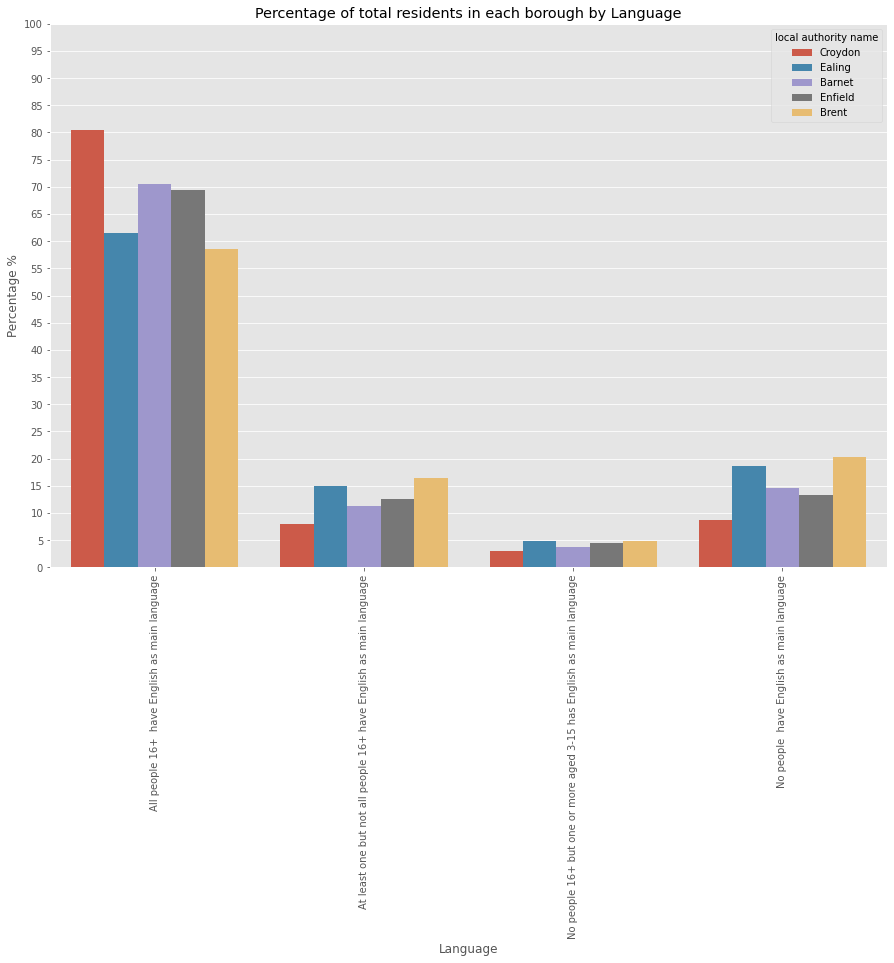

In [47]:
generate_norm_graph(las_most_borough_names, language, "Language", y=[0,105,5])

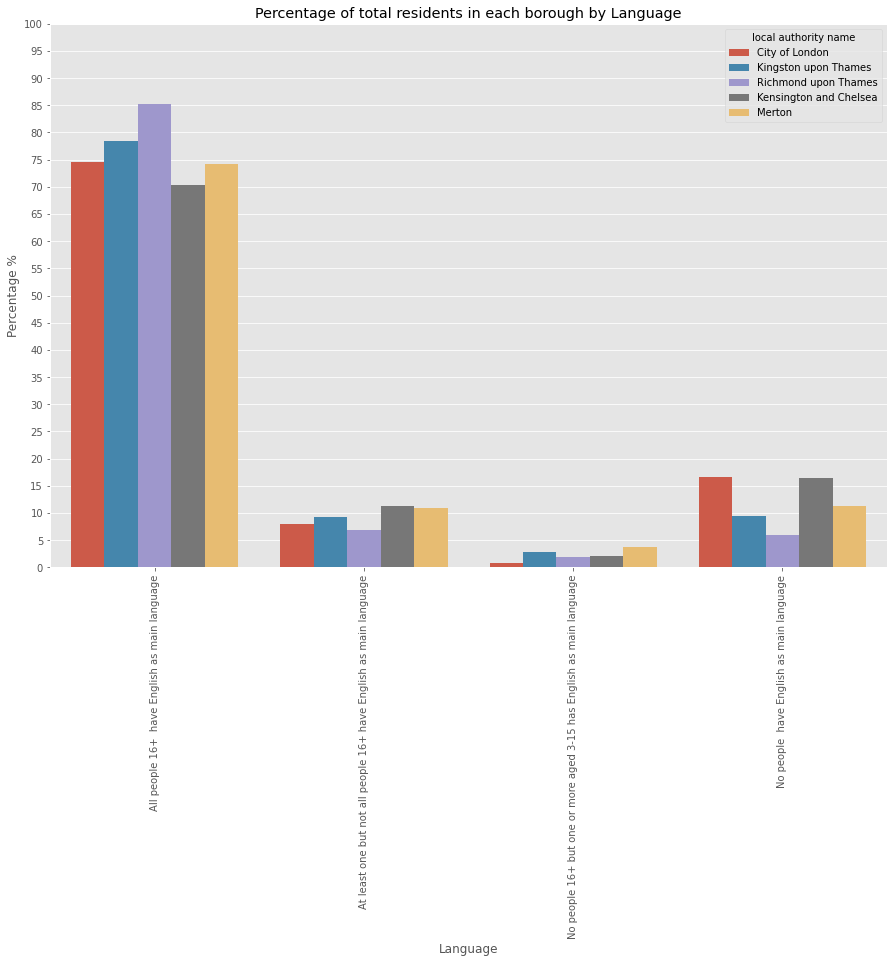

In [48]:
generate_norm_graph(las_least_borough_names, language, "Language", y=[0,105,5])